# DSC 80: Lab 02

### Due Date: Saturday October 17th, at 11:59 PM

## Zoom Lab Hours
- Follow instructions on this link: https://docs.google.com/document/d/16qZpPSYhxwQDMcn-lGQjC-J-PzppLevv_mANLt2ko8g/edit 

## Instructions
Much like in DSC 10, this Jupyter Notebook contains the statements of the homework problems and provides code and markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding work will be developed in an accompanying `lab02.py` file, that will be imported into the current notebook.

Homeworks and programming assignments will be graded in (at most) two ways:
1. The functions and classes in the accompanying python file will be tested (a la DSC 20),
2. The notebook will be graded (for graphs and free response questions).


**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for working in the Notebook**:
- The notebooks serve to present you the questions and give you a place to present your results for later review.
- The notebook on *lab assignments* are not graded (only the `.py` file).
- Notebooks for PAs will serve as a final report for the assignment, and contain conclusions and answers to open ended questions that are graded.
- The notebook serves as a nice environment for 'pre-development' and experimentation before designing your function in your `.py` file.
- If autograder failed, check to make sure there's no syntax errors with the doctests!

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are encouraged to write your own additional functions to solve the lab! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `lab02.py` (much like we do in the notebook).
- Always document your code!

### Importing code from `lab**.py`

* We import our `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab**.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab**.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab**.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab**` merely import the existing compiled python.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lab02 as lab

In [3]:
import os
import pandas as pd
import numpy as np

## Pandas Basics

---

**Question 1: Test scores**

You will be given a small dataset (so that you can manually check the correctness of your code). Please follow a few requirements when solving the problems below:

* For all questions you need to write code general enough to be applied to another similar dataset. 
* Do not hard-code any answers please. 
* Do not use `for` or `while` loops
   

1. Write a function called `data_load` that takes a file name of the data set to be read as a string and returns a dataframe following the steps below:

    a. Read only a subset of columns: `name`, `tries`, `highest_score`, `sex`
    
    b. Then you realized that for your analysis the column `sex` is not needed. Remove it. 
    
    c. You want to customize the column names: rename `name` to `firstname` and `tries` to `attempts`
    
    d. Turn the `firstname` column into the index.


2. Write a function `pass_fail` that takes the dataframe returned from the function above and adds a column `pass` based on the following conditions:

    * "Yes" if a number of attempts is strictly less than 3 and the score is >= 50
    * "Yes" if a number of attempts is strictly less than 6 and the score is >= 70
    * "Yes" if a number of attempts is strictly less than 10 and the score is >= 90
    * "No" otherwise
 
Your function should return the (modified) input dataframe with the added column.
    
3. Write a fuction `av_score` that takes in a dataframe from the question above and returns the average score for those students who passed the test. 
    
4. Write a function `highest_score_name` that takes in the dataframe from question 1.2 and returns a dictionary, where the key is the highest score and the value is the name (as a list) of the person with the highest score (attempts do not count). If more than one student got the highest score, include all names in a list. 

5. Write a function `idx_dup` that does not take any parameters and returns a single integer, answering the question below:

Is it possible for a dataframe's index to have duplicate values?
1. No, the index values must be unique and uses non-negative integers only, just like in numpy arrays
2. No, the index values must be unique and uses integers only
3. No, the index values must be unique but index values are not restricted to integers
4. Yes, but index values must be non-negative integers only
5. Yes, but index values must be integers only
6. Yes and index values are not restricted to integers
    


In [73]:
pd.DataFrame(['a','v','c'],index = [1,1,1])

,0
1,a
1,v
1,c


In [4]:
scores_fp = os.path.join('data', 'scores.csv')

In [23]:
scores = lab.data_load(scores_fp)
scores.head()



,attempts,highest_score
firstname,,
Julia,4,90.0
Angelica,2,70.0
Tyler,2,88.0
Kathleen,7,88.5
Axel,5,45.3


In [54]:
scores_fp = os.path.join('data', 'scores.csv')
scores = lab.data_load(scores_fp)
scores = lab.pass_fail(scores)
isinstance(scores, pd.DataFrame)
 #   True
len(scores.columns)
#    3
scores.loc["Julia", "pass"]=='Yes'
 #   True

True

In [64]:
scores_fp = os.path.join('data', 'scores.csv')
scores = lab.data_load(scores_fp)
scores = lab.pass_fail(scores)
highest = lab.highest_score_name(scores)
isinstance(highest, dict)
#    True
len(next(iter(highest.items()))[1])
 #   3

3

## Tricky Pandas.

Sometimes you can get input that you do not expect. The next set of questions walk you through a few examples that might surprise you. 

---
**Question 2 : Duplicate and selection**



1. Write a function `trick_me` that does not take any parameters. <br>Inside the function: 
    * Create a dataframe `tricky_1` that has three columns labeled: "Name", "Name", "Age". Your table should have 5 rows, the values are up to you. 
    * Save this dataframe in the `csv` file called `tricky_1.csv` without the index. 
    * Now create another dataframe, `tricky_2`, by reading in the file `tricky_1.csv `. What are your observations?
        1. It was not possible to create a dataframe with the duplicate columns
        2. `tricky_1` and `tricky_2` have the same column names
        3. `tricky_1` and `tricky_2` have different column names
    * Return your answer as a letter
    
    

2. Write a function `reason_dup` that answers the following question: `Why does pandas allow us to have duplicate column names?` by returning a corresponding letter. 
    1. It does not, duplicate column names are not allowed
    2. Since duplicate indices are allowed and we also can transpose a dataframe.
    3. It is a bug in Pandas
    
    
   
   
3. Write a function `trick_bool` that does not take any parameters. To determine the correct answers from the list below, you should follow the steps outlined by experimenting in *the notebook* (or a python REPL). Outside the function:
    * Create a dataframe `bools` that has four columns labeled: "True", "True", "False", "False". Each column name is boolean.
    * Your table should have 4 rows, the values are up to you. 
    * You need to think (without running it) what output you should get when running each line of code below. Pick a corresponding answer from a given list. Your function should return a list with three letters that correspond to the dataframe structure for each line below. 
    
     ```
     df[True]
     df[[True, True, False, False]]
     df[[True, False]]
     ```
    
        1. Dataframe: 2 columns, 1 row
        2. Dataframe: 2 columns, 2 rows
        3. Dataframe: 2 columns, 3 rows
        4. Dataframe: 2 columns, 4 rows
        5. Dataframe: 3 columns, 1 rows
        6. Dataframe: 3 columns, 2 rows
        7. Dataframe: 3 columns, 3 rows
        8. Dataframe: 3 columns, 4 rows
        9. Dataframe: 4 columns, 1 rows
        10. Dataframe: 4 columns, 2 rows
        11. Dataframe: 4 columns, 3 rows
        12. Dataframe: 4 columns, 4 rows
        13. Error
    
    
4.  Write a function `reason_bool` that answers the following question: `Why the outputs are the way they are?` by returning a corresponding letter. 
    1. booleans arrays select either rows or columns, randomly
    2. booleans arrays always select rows by default
    3. booleans arrays always select columns by default 
    4. booleans arrays always select rows by default, unless column names are set to `True`/`False` values.
    
    
    
   


In [88]:
test = pd.DataFrame([[1,2,3,4],[2,2,2,4],[3,3,3,4],[4,4,3,4]],columns = [True,True,False,False])
test

,True,True,False,False
0,1,2,3,4
1,2,2,2,4
2,3,3,3,4
3,4,4,3,4


In [94]:
test[True]

,True,True
0,1,2
1,2,2
2,3,3
3,4,4


In [98]:
pd.DataFrame([[1,2],[2,3]],columns = ['a','a'])

,a,a
0,1,2
1,2,3


---
**Question 3 : np.NaN in a dataframe**


In the notebook, use the code given below to create a dataframe called `nans`. Note that we use `np.NaN` (`numpy`'s representation of 'Not a Number') to create missing values.
 
```
nans = pd.DataFrame([[0,1,np.NaN], [np.NaN, np.NaN, np.NaN], [1, 2, 3]])
```
Now you decided to make your dataset more readable for people who do not understand `NaN` and replace it with a `MISSING` string instead. In order to do that you wrote the following function:

```
def change(x):
    if x == np.NaN:
        return "MISSING"
    else:
        return x
```

* Write a line of code that applies the function above to the last column of the `nans` dataframe. 
* What was a result?
    * A: It worked: all np.NaNs in the last columns where changed to "MISSING"
    * B: It did not work: does not matter how I tried, the NaN values were not changed.
    
I expect you to answer `B` here. What had happened? Turns out, you can't use simple comparison `==` to detect if a value is `np.NaN`. You need to use another way to compare a variable to a `np.NaN`, read about it [here](https://stackoverflow.com/questions/41342609/the-difference-between-comparison-to-np-nan-and-isnull)

1. Modify the function `change` above to work as expected.
2. Write method `correct_replacement` that takes in a dataframe like `nans` and returns a modified dataframe, where all the `NaN` are replaced with `"MISSING"`. Use your corrected version of `change` to do this. **The pandas function .fillna is not allowed in this question.** 


In [111]:
nans = pd.DataFrame([[0,1,np.NaN], [np.NaN, np.NaN, np.NaN], [1, 2, 3]])
nans

,0,1,2
0,0.0,1.0,NaN
1,NaN,NaN,NaN
2,1.0,2.0,3.0


In [109]:
def change(x):
    if np.isnan(x):
        return "MISSING"
    else:
        return x


In [114]:
nans.applymap(change)

,0,1,2
0,0,1,MISSING
1,MISSING,MISSING,MISSING
2,1,2,3


In [119]:
nans = pd.DataFrame([[0,1,np.NaN], [np.NaN, np.NaN, np.NaN], [1, 2, 3]])
A = lab.correct_replacement(nans)
(A.values == 'MISSING').sum() == 4
#True

True

---

### Summary Statistics

**Question 4**

In this question you will create two general purpose functions that make it easy to 'qualitatively' assess the contents of a dataframe.

1. Create a function `population_stats` which takes in a dataframe `df` and returns a dataframe indexed by the columns of `df`, with the following columns:
    * `num_nonnull` contains the number of non-null entries in each column,
    * `pct_nonnull` contains the proportion of entries in each column that are non-null,
    * `num_distinct` contains the number of distinct entries in each column,
    * `pct_distinct` contains the proportion of (non-null) entries in each column that are distinct from each other.
    
*Note*: you may find the `.nunique()` series method useful.

*Note*: The number of distinct entries does not include nulls.
    
2. Create a function `most_common` which takes in a dataframe `df` and a number `N` and returns a dataframe of the `N` most-common values (and their counts) for each column of `df`. Any column with fewer than `N` distinct values should contain `NaN` in those entries. 

*Note*: you can loop through the *columns* of `df` to construct your output. You should **not** be looping through rows.

For example, for the subset of the `salaries` dataframe with columns 'Job Title' and 'Status' from lecture one (left), `most_common(salaries, N=5)` is given (right). 

<table><tr>
    <td><img src="imgs/dataframe.png" width="70%"/></td>
    <td><img src="imgs/most_common.png" width="70%"/></td>
</tr></table>

In [211]:
counted = scores.groupby('attempts')['attempts'].count()
val = counted.index.tolist()
cou = counted.values

array([5, 2, 2, 1, 1, 1, 1])

In [198]:
scores['attempts'].count()

13

In [213]:
#count values
col = scores.columns
pd.DataFrame(scores.nunique(),columns = ['attempts'])
scores.head()

,attempts,highest_score,pass
firstname,,,
Julia,4,90.0,Yes
Angelica,2,70.0,Yes
Tyler,2,88.0,Yes
Kathleen,7,88.5,None
Axel,5,45.3,None


In [279]:
col = scores.columns
result = pd.DataFrame()
final = 0
for i in col:
    counted = scores.groupby(i)[i].count().sort_values(ascending = False)
    print(counted)
    val = counted.index.tolist()[:3]
    cou = counted.values[:3]
    form = pd.DataFrame({(i + '_values'):val,(i + '_counts'):cou})
    result = pd.concat([result,form],axis = 1)


attempts
2     5
4     2
3     2
14    1
10    1
7     1
5     1
Name: attempts, dtype: int64
highest_score
100.0    3
99.0     1
98.1     1
90.0     1
88.5     1
88.0     1
70.0     1
67.0     1
55.9     1
45.3     1
34.0     1
Name: highest_score, dtype: int64
pass
Yes    6
Name: pass, dtype: int64


In [280]:
lab.most_common(scores,5)

,attempts_values,attempts_counts,highest_score_values,highest_score_counts,pass_values,pass_counts
0,2,5,100.0,3,Yes,6.0
1,4,2,99.0,1,NaN,NaN
2,3,2,98.1,1,NaN,NaN
3,14,1,90.0,1,NaN,NaN
4,10,1,88.5,1,NaN,NaN


In [278]:
data = np.random.choice(range(10), size=(100, 2))
df = pd.DataFrame(data, columns='A B'.split())
out = lab.most_common(df, N=3)
#out.index.tolist() == [0, 1, 2]
#    True
#out.columns.tolist() == ['A_values', 'A_counts', 'B_values', 'B_counts']
#    True
#out['A_values'].isin(range(10)).all()
#    True
out

,A_values,A_counts,B_values,B_counts
0,1,14,9,14
1,8,13,3,14
2,6,12,2,12


In [268]:
nans

,0,1,2
0,0.0,1.0,NaN
1,NaN,NaN,NaN
2,1.0,2.0,3.0


In [281]:
lab.most_common(nans,4)

,0_values,0_counts,1_values,1_counts,2_values,2_counts
0,1.0,1.0,2.0,1.0,3.0,1.0
1,0.0,1.0,1.0,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN


## Faulty Scooters

**Question 5**

A new electric scooter company 'Maxwell Scooters' opened a retail shop in La Jolla recently and 300 UCSD students bought new scooters for getting around campus. After 8 students start complaining their scooters are faulty, negative on-line reviews for the scooters start to spread. In response, the scooter company adamantly claims that 99% of their scooters come off the production line working properly. You think this seems unlikely and decide to investigate.

* Select a significance level for you investigation. (Not to be turned in)
* What are reasonable choices for the *Null Hypothesis* for your investigation? Select all that apply:
    1. The scooter company produces scooters that are 99% non-faulty.
    2. The scooter company produces scooters that are less than 99% non-faulty.
    3. The scooter company produces scooters that are at least 1% faulty.
    4. The scooter company produces scooters that are ~2.6% faulty.

Return your answer in a function `null_hypoth` that takes zero arguments.

* Create a function `simulate_null` simulates a single step of data generation under the null hypothesis. The function should return a binary array.

* Create a function `estimate_p_val` that takes in a number `N` and returns the estimated p-value of your investigation upon simulating the null hypothesis `N` times.

*Note*: Plot the Null distribution and your observed statistic to check your work.

In [286]:
pd.Series(lab.simulate_null()).isin([0,1]).all()
 #   True

True

In [288]:
np.sum([1,2,3])

6

In [293]:
#plot null distribution


True

In [292]:
lab.estimate_p_val(1000)

0.01200000000000001

# Super-Heroes

The questions below analyze a dataset of super-heroes found in the `data` directory. One of the datasets have a list of attributes on each super-hero, while the other is a *boolean* dataframe of which super-heroes have which super-powers. Note, the datasets contain information on both *good* super-heroes, as well as *bad* super-heroes (AKA villains). 

### Super-hero powers

**Question 6**

Now read in the dataset of super-hero powers in the `data` directory. Create a function `super_hero_powers` that takes in a dataframe like `powers` and returns a list with the following three entries:

1. The name of the super-hero with the greatest number of powers.
2. The name of the most common super-power among super-heroes whose names begin with 'M'.
3. The most popular super-power among those with only one super-power.

You should *not* be hard-coding your answers in this question; your function should work on any dataset similar to `powers`. You should not be using loops in this question.

*Note:* You may find the `.idxmax` method useful in this problem.

In [294]:
powers_fp = os.path.join('data', 'superheroes_powers.csv')
powers = pd.read_csv(powers_fp)
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [351]:
fp = os.path.join('data', 'superheroes_powers.csv')
powers = pd.read_csv(fp)
out = lab.super_hero_powers(powers)
isinstance(out, list)
#    True
len(out)
#    3
all([isinstance(x, str) for x in out])
#    True

True

In [299]:
setted[setted['Omniscient'] == True]

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
Man of Miracles,False,True,False,True,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,True,True
One-Above-All,True,True,False,True,False,True,False,True,True,False,...,False,True,False,False,False,False,False,False,True,True


### Super-hero attributes

Read in the dataset of super-hero attributes from the `data` directory. Use your summary functions from question 4 to help acquaint yourself with the dataset.

**Question 7**

Cleaning the data: the dataset has no explicit null (`np.NaN`) values, although many entries *should* be null. Replace these values with null by creating a function `clean_heroes`.

Now answer the following questions, collecting your answers in a (function `super_hero_stats` that returns) a list. You should answer the questions using the *cleaned* super-heroes data; your answers *should* be hard-coded in the function.
1. Which publisher has a greater proportion of 'bad' characters -- Marvel Comics or DC Comics?
2. Give the number of characters that are NOT human, or the publisher is not Marvel Comics nor DC comics. For this question, only consider race "Human" as human, races such as "Human / Radiation" don't count as human.
3. Give the name of the character that's both greater than one standard deviation above mean in height and at least one standard deviation below the mean in weight.
4. Who is heavier on average: good or bad characters?
5. What is the name of the tallest Mutant with no hair?
6. What is the probability that a randomly chosen 'Marvel' character in the dataset is a woman?

*Note:* Since your answers to these questions should be hard-coded, you should not include your code in your .py file. Just return a list with your answers.

*Note:* Nan denotes an unknown value that does not count as an entry with any attributes.

In [371]:
superheroes_fp = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(superheroes_fp, index_col=0)
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [412]:
superheroes_fp = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(superheroes_fp, index_col=0)
out = lab.clean_heroes(heroes)
out['Skin color'].isnull().any()
#    True
out['Weight'].isnull().any()
#    True

True

In [457]:
out[(out['Publisher'] == 'Marvel Comics') & (out['Gender'] == 'Female')]
111/len(out)

0.15122615803814715

In [436]:
out[~out['Height'].isnull()]['Height'].mean()

186.72630560928434

In [437]:
out[~out['Height'].isnull()]['Height'].std()

59.25189465200381

In [443]:
hh = 186.7263 + 59.25189

In [385]:
out.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN


In [440]:
out[~out['Weight'].isnull()]['Weight'].mean()

112.25252525252525

In [441]:
out[~out['Weight'].isnull()]['Weight'].std()

104.15114206482691

In [445]:
ww = 112.25252 -104.15114206482691
out[(out['Height'] > hh) & (out['Weight'] < ww)]


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
302,Groot,Male,yellow,Flora Colossus,NaN,701.0,Marvel Comics,NaN,good,4.0


In [419]:
#alignment proportion
align = out[['Publisher','Alignment']]
align = align.replace({'good':0,'bad':1,'neutral':0})
counted = align.groupby('Publisher').count()
#align[align['Publisher'] == 'ABC Studios']
x = align.groupby('Publisher').agg('mean')

In [431]:
#no marvel and dc
nmd = out[(out['Publisher'] != 'DC Comics') & (out['Publisher'] != 'Marvel Comics')]
nmd_n = len(nmd[nmd['Race'] != 'Human'])
md =  out[(out['Publisher'] == 'DC Comics') | (out['Publisher'] == 'Marvel Comics')]
md[(md['Race'] != 'Human') & ~(md['Race'].isna())]
183 + 99

282

### Are blond-haired, blue-eyed characters disproportionately 'good'?

**Question 8**

1. Create a function `bhbe` ('blond-hair-blue-eyes') that returns a boolean column that labels super-heroes/villains that are blond-haired *and* blue eyed.
    * Look at the values of the hair/eyes columns; it needs some cleaning! (The doctest makes sure you've cleaned it properly. If you don't pass the doctest, look more closely at the values in the columns!)


Now, you'd like to answer the question 
> "Are blond-haired, blue-eyed characters disproportionately 'good'?"

To do this, you'd like to test the null hypothesis:
> "The proportion of 'good' heroes among blond-haired, blue-eyed heroes is roughly the same as (equals) the proportion of 'good' heroes in the overall population."

Fix a significance level of 1%.

2. Create a function `observed_stat` that takes in `heroes`, and returns the observed test statistic.
3. Create a function `simulate_bhbe_null` that takes in a number `n` that returns a `n` instances of the test statistic generated under the null hypothesis. You should hard-code your simulation parameter into the function (rounding to the nearest hundredth is fine); the function should *not* read in any data.
4. Create a function `calc_pval` that returns a list where:
    * the first element is the p-value for hypothesis test (using 100,000 simulations). Please run the code yourself and hard-code this answer, as actually running the 100,000 simulation hypothesis test will timeout on gradescope. 
    * the second element is `Reject` if you reject the null hypothesis and `Fail to reject` if you fail to reject the null hypothesis.

In [551]:
heroes

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,bh,be
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,False,True
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,True
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,True,True
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,False,False
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,False,False
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,False,True


In [572]:
superheroes_fp = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(superheroes_fp, index_col=0)
out = lab.simulate_bhbe_null(100000)



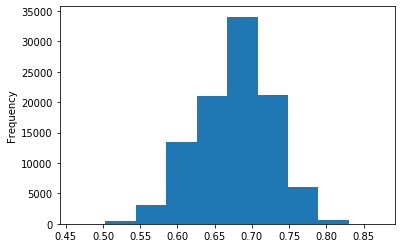

In [574]:
#find p value
obs = lab.observed_stat(heroes)
(obs <= out).mean()

out.plot(kind = 'hist')

In [575]:
obs

0.8494623655913979

In [563]:
pd.Series(val).value_counts(normalize = True)['good']

0.6881720430107527

In [542]:
superheroes_fp = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(superheroes_fp, index_col=0)
out = lab.observed_stat(heroes)
0.5 <= out <= 1.0
#    True
out

0.8494623655913979

In [518]:
copy = heroes
copy['bh'] = copy['Hair color'].apply(lambda x: True if "Blond" in x else False)

copy['be'] = copy['Eye color'].apply(lambda x: True if "blue" in x else False)


copy.loc[copy['Hair color'] == 'blond',['bh']] = True
((copy['bh'] == True) & (copy['be'] == True)).sum()

93

In [550]:
superheroes_fp = os.path.join('data', 'superheroes.csv')
heroes = pd.read_csv(superheroes_fp, index_col=0)
out = lab.bhbe_col(heroes)
isinstance(out, pd.Series)
#    True
#out.dtype == np.dtype('bool')
 #   True
#out.sum()
#    93

True

In [515]:
out.sum()

583